In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import fbprophet as prophet

In [21]:
from sklearn.preprocessing import minmax_scale

<IPython.core.display.Javascript object>

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
%matplotlib inline
%load_ext nb_black

2022-04-05 00:25:01,104 - blib2to3.pgen2.driver - INFO - Generating grammar tables from /opt/anaconda3/envs/transmilenio/lib/python3.8/site-packages/blib2to3/Grammar.txt
2022-04-05 00:25:01,124 - blib2to3.pgen2.driver - INFO - Writing grammar tables to /Users/juanazuero/Library/Caches/black/20.8b1/Grammar3.8.0.final.0.pickle
2022-04-05 00:25:01,125 - blib2to3.pgen2.driver - INFO - Writing failed: [Errno 2] No such file or directory: '/Users/juanazuero/Library/Caches/black/20.8b1/tmpoqmhampk'
2022-04-05 00:25:01,125 - blib2to3.pgen2.driver - INFO - Generating grammar tables from /opt/anaconda3/envs/transmilenio/lib/python3.8/site-packages/blib2to3/PatternGrammar.txt
2022-04-05 00:25:01,127 - blib2to3.pgen2.driver - INFO - Writing grammar tables to /Users/juanazuero/Library/Caches/black/20.8b1/PatternGrammar3.8.0.final.0.pickle
2022-04-05 00:25:01,128 - blib2to3.pgen2.driver - INFO - Writing failed: [Errno 2] No such file or directory: '/Users/juanazuero/Library/Caches/black/20.8b1/tmp60

<IPython.core.display.Javascript object>

In [4]:
validaciones_troncal_summary = catalog.load("validaciones_troncal_summary@pandas")

2022-04-05 00:25:01,140 - kedro.io.data_catalog - INFO - Loading data from `validaciones_troncal_summary@pandas` (ParquetDataSet)...


<IPython.core.display.Javascript object>

In [5]:
# dic_estacion_linea = catalog.load("dic_estacion_linea_int")

<IPython.core.display.Javascript object>

In [6]:
validaciones_troncal_summary = validaciones_troncal_summary[
    validaciones_troncal_summary["Estación"].apply(lambda x: len(x.split(")")[0])) == 6
].copy()

<IPython.core.display.Javascript object>

In [7]:
validaciones_troncal_summary["cod_est"] = validaciones_troncal_summary[
    "Estación"
].apply(lambda x: int(x.split(")")[0][1:]))

<IPython.core.display.Javascript object>

In [8]:
validaciones_troncal_summary["date_hour"] = validaciones_troncal_summary.apply(
    lambda row: pd.Timestamp(
        year=row["date"].year,
        month=row["date"].month,
        day=row["date"].day,
        hour=row["Intervalo"].hour,
    ),
    axis=1,
)

<IPython.core.display.Javascript object>

In [9]:
demand_summary = (
    validaciones_troncal_summary[["date_hour", "demand"]].groupby("date_hour").sum()
)

<IPython.core.display.Javascript object>

In [10]:
demand_summary = demand_summary[
    demand_summary.index > pd.Timestamp(year=2018, month=1, day=1)
].copy()

<IPython.core.display.Javascript object>

In [11]:
start_range = min(demand_summary.index)
end_range = max(demand_summary.index)

<IPython.core.display.Javascript object>

In [12]:
complete_index = pd.date_range(start=start_range, end=end_range, freq="1H")

<IPython.core.display.Javascript object>

In [13]:
dates_to_impute = [x for x in complete_index if x not in demand_summary.index]

<IPython.core.display.Javascript object>

In [14]:
for d in dates_to_impute:
    demand_summary.loc[d, "demand"] = 0

<IPython.core.display.Javascript object>

In [15]:
demand_summary = demand_summary.sort_index()

<IPython.core.display.Javascript object>

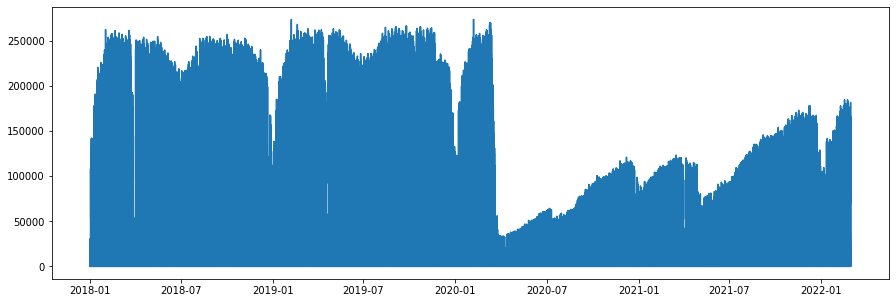

<IPython.core.display.Javascript object>

In [16]:
fig, ax = plt.subplots()
ax.plot(demand_summary["demand"])
fig.set_size_inches(15, 5)

In [17]:
del validaciones_troncal_summary

<IPython.core.display.Javascript object>

In [18]:
demand_summary.reset_index(inplace=True)

<IPython.core.display.Javascript object>

In [19]:
demand_summary_prev = demand_summary[
    demand_summary["date_hour"] < pd.Timestamp(year=2020, month=3, day=20)
].copy()

<IPython.core.display.Javascript object>

In [20]:
demand_summary_prev["hour"] = demand_summary_prev["date_hour"].apply(lambda x: x.hour)

<IPython.core.display.Javascript object>

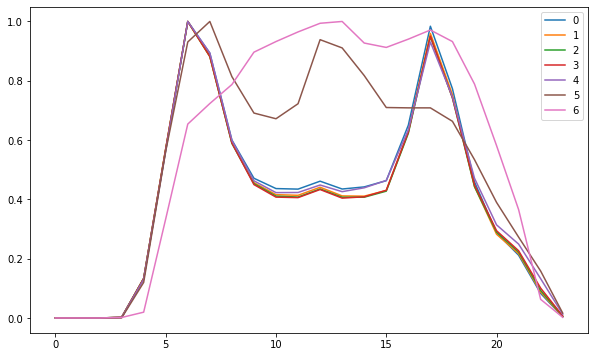

<IPython.core.display.Javascript object>

In [27]:
fig, ax = plt.subplots()
for i in range(7):
    ax.plot(
        minmax_scale(
            demand_summary_prev[
                demand_summary_prev["date_hour"].apply(lambda x: x.weekday() == i)
            ]
            .groupby("hour")
            .mean()["demand"]
        ),
        label=i,
    )
plt.legend()
fig.set_size_inches(10, 6)

In [48]:
demand_summary_post = demand_summary[
    (demand_summary["date_hour"] > pd.Timestamp(year=2021, month=5, day=4))
    & (demand_summary["date_hour"] < pd.Timestamp(year=2021, month=6, day=1))
].copy()

<IPython.core.display.Javascript object>

In [49]:
demand_summary_post["hour"] = demand_summary_post["date_hour"].apply(lambda x: x.hour)

<IPython.core.display.Javascript object>

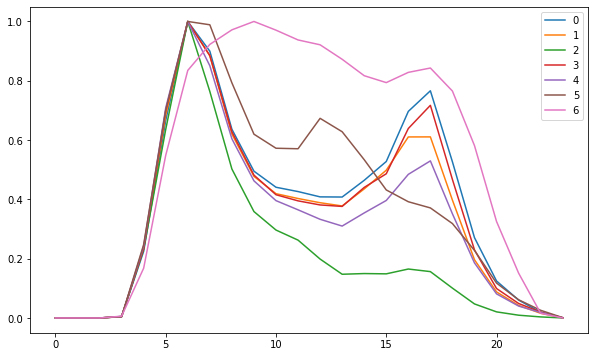

<IPython.core.display.Javascript object>

In [50]:
fig, ax = plt.subplots()
for i in range(7):
    ax.plot(
        minmax_scale(
            demand_summary_post[
                demand_summary_post["date_hour"].apply(lambda x: x.weekday() == i)
            ]
            .groupby("hour")
            .mean()["demand"]
        ),
        label=i,
    )
plt.legend()
fig.set_size_inches(10, 6)

In [29]:
start_quarantine = pd.Timestamp(year=2020, month=3, day=20)

<IPython.core.display.Javascript object>

In [60]:
start_quarantine_2 = pd.Timestamp(year=2021, month=1, day=15)

<IPython.core.display.Javascript object>

In [82]:
start_quarantine_3 = pd.Timestamp(year=2021, month=4, day=29)

<IPython.core.display.Javascript object>

In [56]:
demand_summary["quarantine"] = demand_summary["date_hour"] >= start_quarantine
demand_summary["prev_quarantine"] = demand_summary["date_hour"] < start_quarantine

<IPython.core.display.Javascript object>

In [54]:
demand_summary["sunday"] = demand_summary["date_hour"].apply(lambda x: x.weekday() == 6)
demand_summary["saturday"] = demand_summary["date_hour"].apply(
    lambda x: x.weekday() == 5
)
demand_summary["weekday"] = demand_summary["date_hour"].apply(lambda x: x.weekday() < 5)

<IPython.core.display.Javascript object>

In [55]:
demand_summary["weekday_quar"] = (
    demand_summary["quarantine"] & demand_summary["weekday"]
)
demand_summary["weekday_prev_quar"] = (~demand_summary["quarantine"]) & demand_summary[
    "weekday"
]
demand_summary["sunday_quar"] = demand_summary["quarantine"] & demand_summary["sunday"]
demand_summary["sunday_prev_quar"] = (~demand_summary["quarantine"]) & demand_summary[
    "sunday"
]
demand_summary["saturday_quar"] = (
    demand_summary["quarantine"] & demand_summary["saturday"]
)
demand_summary["saturday_prev_quar"] = (~demand_summary["quarantine"]) & demand_summary[
    "saturday"
]

<IPython.core.display.Javascript object>

In [83]:
chgs_base = [start_quarantine, start_quarantine_2, start_quarantine_3]

<IPython.core.display.Javascript object>

In [85]:
start_chgs = demand_summary["date_hour"].min()
end_chgs = demand_summary["date_hour"].max()

<IPython.core.display.Javascript object>

In [106]:
def chgs_from_base(chgs_base, start_chgs, end_chgs):
    chgs_base.sort()
    chgs_base_comp = [start_chgs] + chgs_base + [end_chgs]
    chgs_base_comp = [start_chgs] + chgs_base + [end_chgs]
    chgs_res = []
    for ch in chgs_base:
        chgs_res += [
            ch,
            ch + pd.Timedelta(value=1, unit="days"),
            ch - pd.Timedelta(value=1, unit="days"),
            ch + pd.Timedelta(value=3, unit="days"),
            ch - pd.Timedelta(value=3, unit="days"),
            ch + pd.Timedelta(value=5, unit="days"),
            ch - pd.Timedelta(value=5, unit="days"),
        ]
    for i in range(len(chgs_base_comp) - 1):
        start_period = chgs_base_comp[i]
        end_period = chgs_base_comp[i + 1]
        dist_periods = (end_period - start_period).days
        num_chgs = int(dist_periods / 180)
        chgs_res += [
            start_period
            + pd.Timedelta(unit="D", value=j * int(dist_periods / (num_chgs + 1)))
            for j in range(1, num_chgs + 1)
        ]
    return chgs_res

<IPython.core.display.Javascript object>

In [107]:
chgs = chgs_from_base(chgs_base, start_chgs, end_chgs)

<IPython.core.display.Javascript object>

In [120]:
model = prophet.Prophet(
    interval_width=0.95,
    yearly_seasonality=True,
    daily_seasonality=False,
    weekly_seasonality=False,
    seasonality_mode="multiplicative",
    changepoints=chgs,
    changepoint_prior_scale=50,
)
model.add_country_holidays(country_name="CO")

<IPython.core.display.Javascript object>

In [121]:
demand_summary.rename({"date_hour": "ds", "demand": "y"}, axis=1, inplace=True)

<IPython.core.display.Javascript object>

In [122]:
model.add_seasonality(name='weekly_quarantine', period=7, fourier_order=3, condition_name='quarantine')
model.add_seasonality(name='weekly_prev_quarantine', period=7, fourier_order=3, condition_name='prev_quarantine')


<IPython.core.display.Javascript object>

In [123]:
model.add_seasonality(
    name="weekday_quar", period=1, fourier_order=7, condition_name="weekday_quar"
)
model.add_seasonality(
    name="weekday_prev_quar",
    period=1,
    fourier_order=7,
    condition_name="weekday_prev_quar",
)
model.add_seasonality(
    name="sunday_quar", period=1, fourier_order=7, condition_name="sunday_quar"
)
model.add_seasonality(
    name="sunday_prev_quar",
    period=1,
    fourier_order=7,
    condition_name="sunday_prev_quar",
)
model.add_seasonality(
    name="saturday_quar", period=1, fourier_order=7, condition_name="saturday_quar"
)
model.add_seasonality(
    name="saturday_prev_quar",
    period=1,
    fourier_order=7,
    condition_name="saturday_prev_quar",
)

<IPython.core.display.Javascript object>

In [124]:
model.fit(demand_summary)

/opt/anaconda3/envs/transmilenio/lib/python3.8/site-packages/fbprophet/forecaster.py:434: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  .astype(np.float)


Initial log joint probability = -1624.64


    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
      99       79947.7     0.0229883       27831.6      0.1233      0.1233      133   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     199       81793.3      0.041654       4725.64           1           1      248   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     299       82074.9    0.00503398       1512.96           1           1      375   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     399       82307.1    0.00077863          1615      0.3384      0.3384      495   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     499       82550.5     0.0690659       4852.51           1           1      610   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
     599     

<IPython.core.display.Javascript object>

      alpha0  # evals  Notes 
    2299       88556.4     0.0037713       1909.98           1           1     2735   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    2399       88567.7    0.00556305       1045.53           1           1     2858   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    2499       88582.4     0.0123962       726.826           1           1     2973   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    2599       88605.6    0.00580097       1793.32      0.5539      0.5539     3084   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    2699       88613.2    0.00221596        792.92           1           1     3197   
    Iter      log prob        ||dx||      ||grad||       alpha      alpha0  # evals  Notes 
    2799       88618.8   5.97436e-05       272.179      0.5025      0.5025 

/opt/anaconda3/envs/transmilenio/lib/python3.8/site-packages/fbprophet/forecaster.py:434: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  .astype(np.float)
/opt/anaconda3/envs/transmilenio/lib/python3.8/site-packages/fbprophet/forecaster.py:434: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  .astype(np.float)
/opt/anaconda3/envs/transmilenio

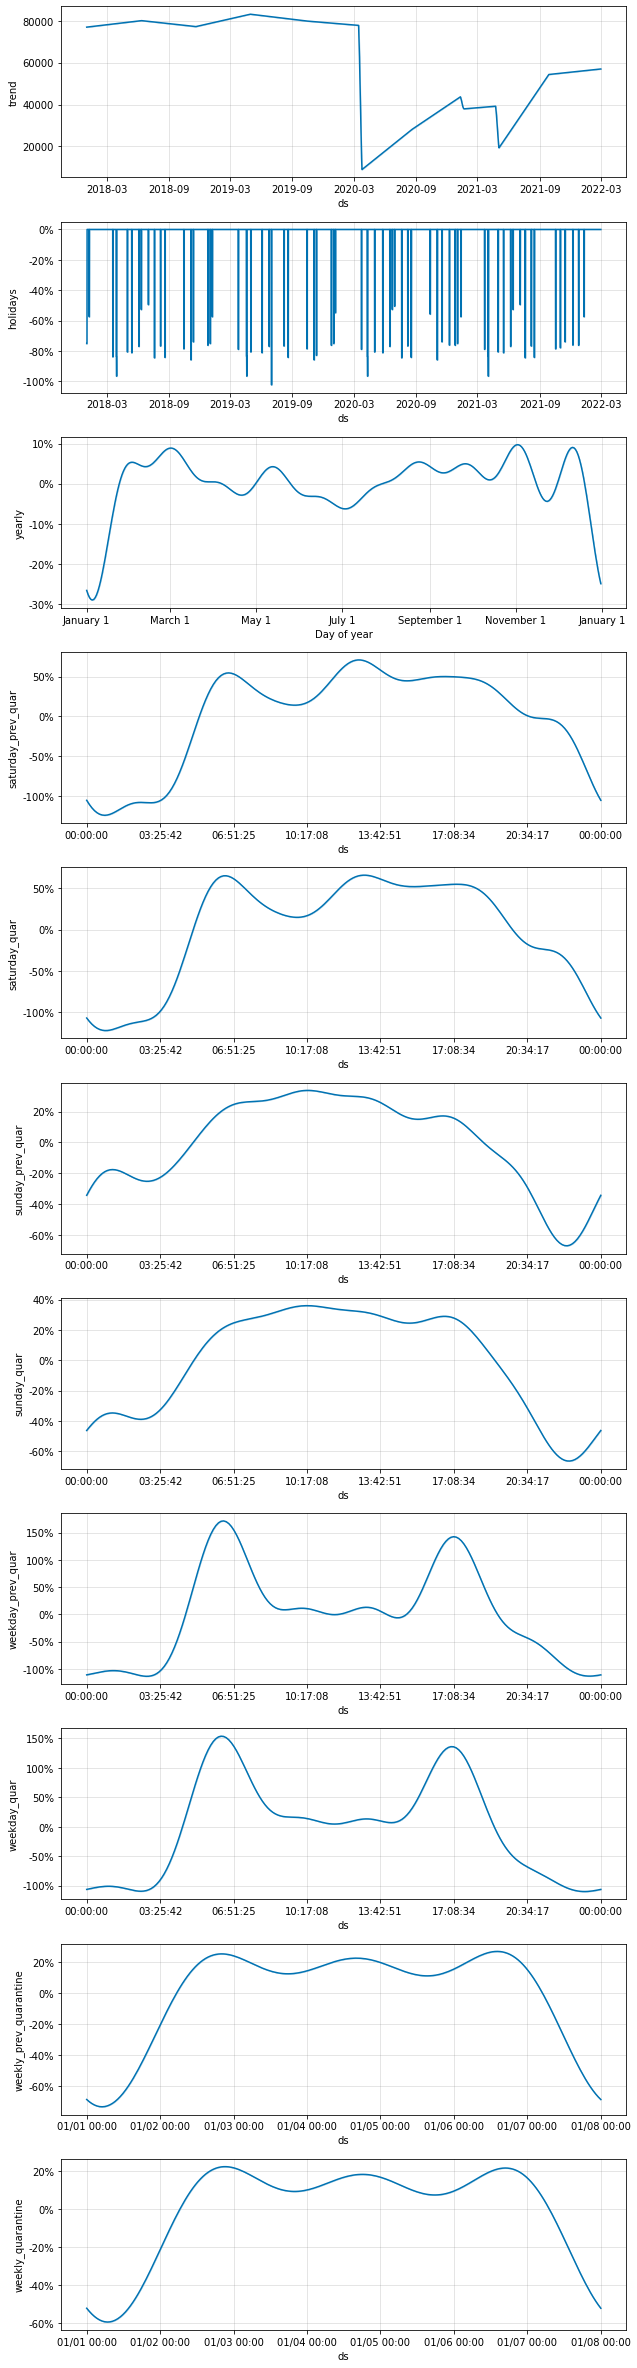

<IPython.core.display.Javascript object>

In [125]:
ax = model.plot_components(model.predict())

In [ ]:
pred = demand_summary.copy()

In [26]:
forecast = model.predict(pred)
fig = plt.gcf()
fig.set_size_inches(17, 5)
plt.plot(demand_summary["ds"], demand_summary["demand"], label="Observado")
plt.plot(forecast["ds"], forecast["yhat"], label="Modelado", color="orange")
plt.legend(loc="upper left")

NameError: name 'model' is not defined

<IPython.core.display.Javascript object>